In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [3]:
# Load image
img = mpimg.imread('../Minimaps/FiringRange/map.jpeg')

# Load data
df = pd.read_csv('../Minimaps/FiringRange/3A_Stack_annotations.csv')

# Extract coordinates
x = df['x'].values
y = df['y'].values

Text(0.5, 1.0, 'Hotspots on Firing Range')

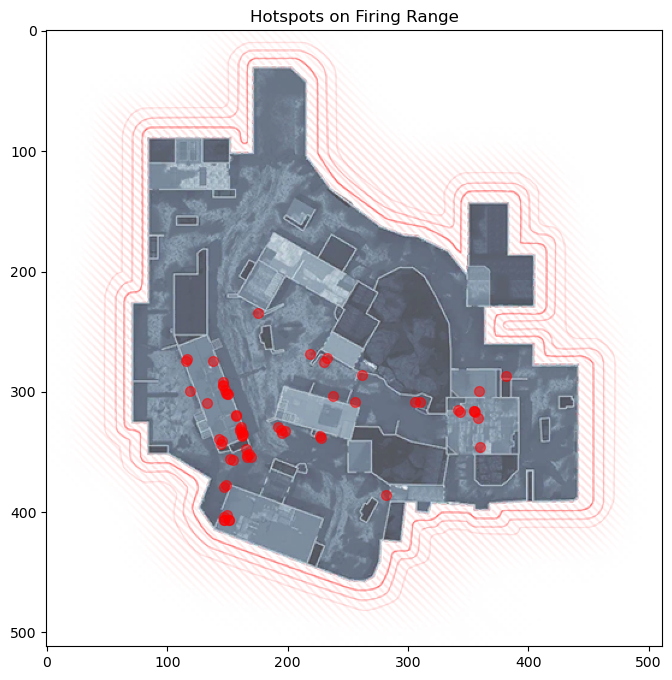

In [4]:
# Plot image
fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(img)
ax.scatter(x, y, c='red', s=50, alpha=0.5)
ax.set_title('Hotspots on Firing Range')

In [5]:
# Load data
df = pd.read_excel('../Data/map_setups.xlsx')
df.head()

,Map,Opp,Round,Type,Archetype,PlantSite,PlantSuccess,Outcome
0,Firing Range,Wolves,1,Def,3A Stack,A,No,W
1,Firing Range,Wolves,2,Def,3A Stack,A,Yes,L
2,Firing Range,Wolves,3,Def,3A Stack,NaN,A,L
3,Firing Range,Wolves,4,Def,3A Stack,NaN,B,W
4,Firing Range,Wolves,5,Def,3A Stack,A,Yes,L


In [7]:
# Most common setups
top_setups = df['Archetype'].value_counts()
print(top_setups)

Archetype
3A Stack        17
212 Default      4
Mid Lurk         3
Passive Hold     2
Name: count, dtype: int64


In [8]:
import random

# Possible hyperparameters to search over
HPARAM_SPACE = {
    "learning_rate": [5e-6, 1e-5, 2e-5, 3e-5],
    "num_train_epochs": [3, 5, 8, 10],
    "per_device_train_batch_size": [8, 16],
    "per_device_eval_batch_size": [2, 4, 8],
    "gradient_accumulation_steps": [1,2],
    "weight_decay": [0.0, 0.01, 0.05],
    "lr_scheduler_type": ["linear", "cosine"],
}

def sample_hparams(space):
    """Randomly sample a hyperparameter config."""
    return {k: random.choice(v) for k, v in space.items()}

hparams = sample_hparams(HPARAM_SPACE)

In [11]:
# Convert to dataframe for better visualization
hparams_df = pd.DataFrame([hparams])
(hparams_df)

,learning_rate,num_train_epochs,per_device_train_batch_size,per_device_eval_batch_size,gradient_accumulation_steps,weight_decay,lr_scheduler_type
0,0.00002,5,8,8,2,0.01,linear
